# Step - 1 : Data Collection

In [19]:
# !pip -q install yfinance

In [ ]:
# import yfinance as yf
# ticker = 'AAPL'
# start_date = '2015-01-01'
# end_date = '2024-01-01'
# data = yf.download(ticker, start=start_date, end=end_date)

"ticker = 'AAPL'\nstart_date = '2015-01-01'\nend_date = '2024-01-01'\ndata = yf.download(ticker, start=start_date, end=end_date)"

In [21]:
# print(data.head())

In [22]:
# data.to_csv("AAPL_stock-price.csv")

In [25]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\prash\OneDrive\Desktop\Stock-Price-Prediction\AAPL_stock-price.csv")
df.head()

,Date,Close,High,Low,Open,Volume
0,02-01-2015,24.288580,24.757334,23.848706,24.746226,212818400
1,05-01-2015,23.604330,24.137511,23.417718,24.057533,257142000
2,06-01-2015,23.606556,23.866481,23.244437,23.668760,263188400
3,07-01-2015,23.937572,24.037543,23.704305,23.815385,160423600
4,08-01-2015,24.857309,24.915071,24.148623,24.266369,237458000


In [26]:
df.shape

(2264, 6)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2264 non-null   object 
 1   Close   2264 non-null   float64
 2   High    2264 non-null   float64
 3   Low     2264 non-null   float64
 4   Open    2264 non-null   float64
 5   Volume  2264 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 106.2+ KB


Handling Missing Values

In [29]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

# Step-2 : EDA

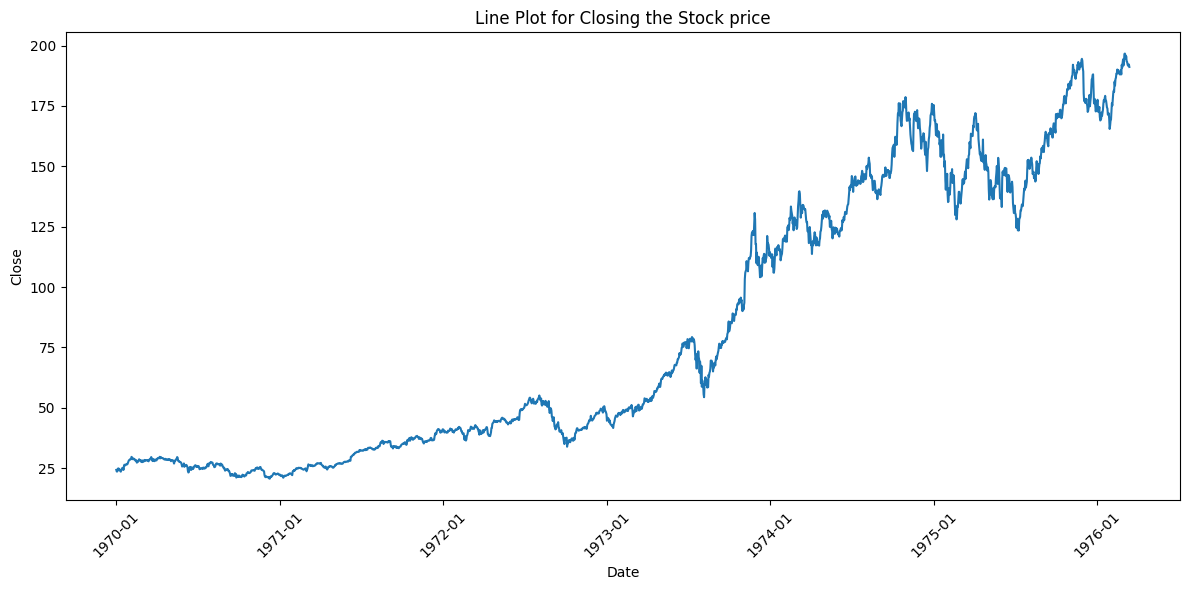

In [53]:
# Line plot for Closing price --> When it is closing
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"])
plt.title("Line Plot for Closing the Stock price")
plt.xlabel("Date")
plt.ylabel("Close")
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()

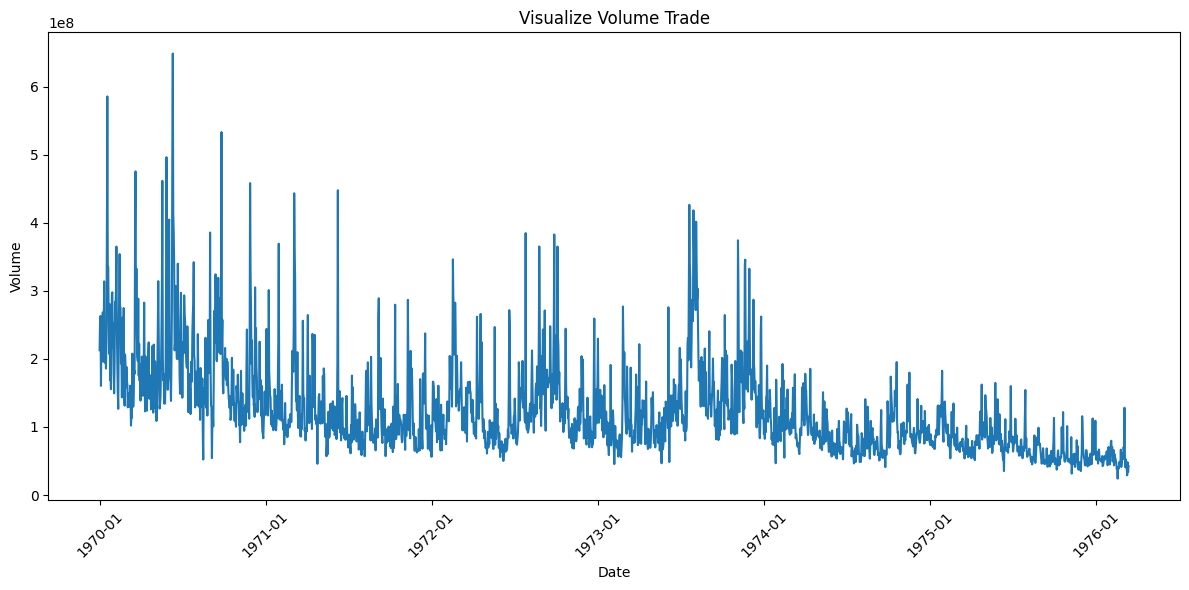

In [52]:
# Visualize volume trade
import matplotlib.dates as mdates
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Volume"])
plt.title("Visualize Volume Trade")
plt.xlabel("Date")
plt.ylabel("Volume")  
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()

Finding Correlation between the data

In [42]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

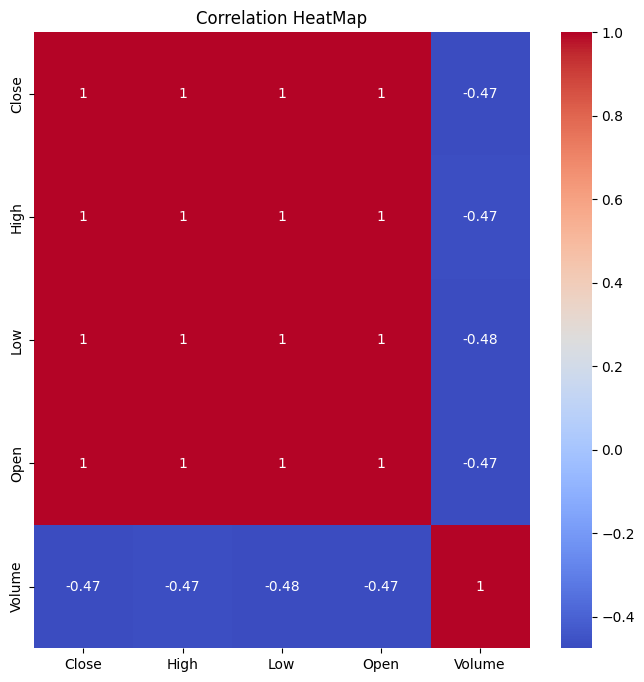

In [ ]:
import seaborn as sns
corr_matrix = df[['Close', 'High', 'Low', 'Open', 'Volume']].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation HeatMap")
plt.show() 

# Step - 3 : Feature Engineering

In [54]:
# 7-day and 21-day Simple Moving Average
df['SMA_7'] = df['Close'].rolling(window=7).mean()
df['SMA_21'] = df['Close'].rolling(window=21).mean()

In [56]:
df["SMA_7"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2259    194.521210
2260    193.803611
2261    193.176773
2262    192.849173
2263    192.223753
Name: SMA_7, Length: 2264, dtype: float64

In [57]:
df["SMA_21"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2259    192.085712
2260    192.231314
2261    192.390151
2262    192.540480
2263    192.689862
Name: SMA_21, Length: 2264, dtype: float64

In [58]:
# Exponential Moving Average (EMA)
df['EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()
df['EMA_21'] = df['Close'].ewm(span=21, adjust=False).mean()

In [59]:
df["EMA_7"]

0        24.288580
1        24.117517
2        23.989777
3        23.976726
4        24.196872
           ...    
2259    193.652672
2260    193.151148
2261    192.799816
2262    192.643040
2263    192.264862
Name: EMA_7, Length: 2264, dtype: float64

In [60]:
df["EMA_21"]

0        24.288580
1        24.226375
2        24.170028
3        24.148896
4        24.213297
           ...    
2259    191.709712
2260    191.703973
2261    191.707777
2262    191.750044
2263    191.693706
Name: EMA_21, Length: 2264, dtype: float64

In [61]:
# Daily returns
df['Return'] = df['Close'].pct_change()

In [62]:
df["Return"]

0            NaN
1      -0.028172
2       0.000094
3       0.014022
4       0.038422
          ...   
2259   -0.005547
2260   -0.002841
2261    0.000518
2262    0.002226
2263   -0.005424
Name: Return, Length: 2264, dtype: float64

In [63]:
# Volatility (Rolling STD of Returns)
df['Volatility_7'] = df['Return'].rolling(window=7).std()
df['Volatility_21'] = df['Return'].rolling(window=21).std()

In [64]:
# Lag Features (Yesterday’s Close, etc.)
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)

In [65]:
df = df.dropna().reset_index(drop=True)

In [66]:
df.head()

,Date,Close,High,Low,Open,Volume,SMA_7,SMA_21,EMA_7,EMA_21,Return,Volatility_7,Volatility_21,Lag_1,Lag_2
0,03-02-2015,26.359097,26.456845,26.128052,26.325772,207662800,25.735148,24.763048,25.835429,25.074622,0.000168,0.029946,0.023228,26.354656,26.028078
1,04-02-2015,26.561258,26.772310,26.283560,26.325771,280598800,25.940168,24.903854,26.016886,25.209771,0.007670,0.029817,0.022019,26.359097,26.354656
2,05-02-2015,26.750841,26.815522,26.596946,26.768683,168984800,26.297950,25.053582,26.200375,25.349868,0.007138,0.023102,0.021981,26.561258,26.359097
3,06-02-2015,26.525578,26.819984,26.418520,26.768685,174826400,26.427734,25.176820,26.281676,25.456751,-0.008421,0.014947,0.022127,26.750841,26.561258
4,09-02-2015,26.701775,26.728538,26.414059,26.440824,155559200,26.468755,25.264652,26.386700,25.569935,0.006643,0.009822,0.020782,26.525578,26.750841


In [67]:
df.isnull().sum()

Date             0
Close            0
High             0
Low              0
Open             0
Volume           0
SMA_7            0
SMA_21           0
EMA_7            0
EMA_21           0
Return           0
Volatility_7     0
Volatility_21    0
Lag_1            0
Lag_2            0
dtype: int64

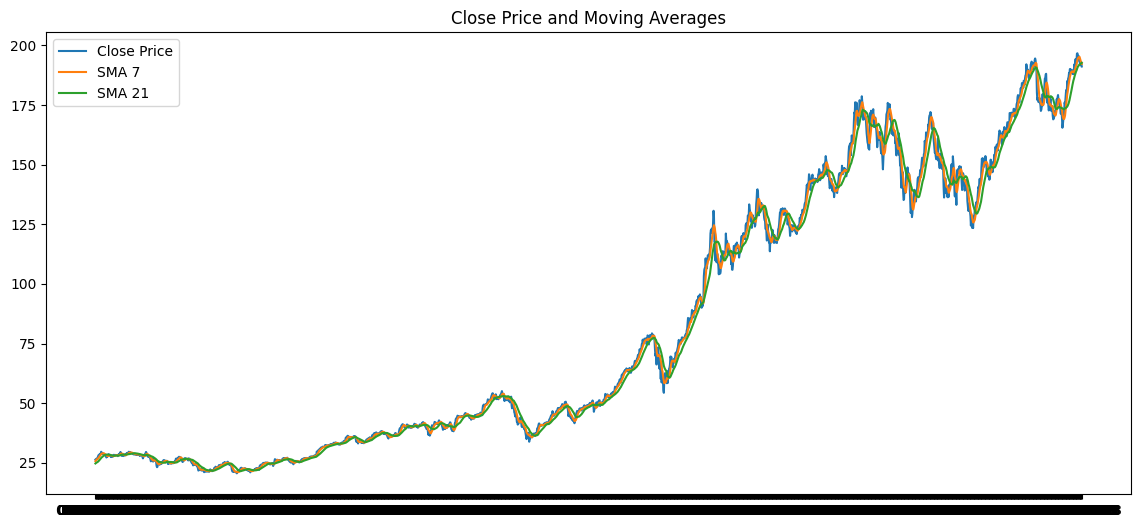

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['SMA_7'], label='SMA 7')
plt.plot(df['Date'], df['SMA_21'], label='SMA 21')
plt.title("Close Price and Moving Averages")
plt.legend()
plt.show()

# Step - 4 : Data Partition

In [70]:
df['Target'] = df['Close'].shift(-1)
# Drop last row (since Target is NaN there)
df = df.dropna().reset_index(drop=True)

In [71]:
feature_cols = ['Close', 'SMA_7', 'SMA_21', 'EMA_7', 'EMA_21', 
                'Return', 'Volatility_7', 'Volatility_21', 'Lag_1', 'Lag_2']

In [75]:
X = df[feature_cols]
Y = df["Target"]

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=44, shuffle=False)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1569, 10), (673, 10), (1569,), (673,))

# Step - 5 : Model Development

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Prediction
y_pred = model.predict(X_test)

# Step - 6 : Model Evaluation

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
print("MSE : ", np.round(mse, 2))
mae = mean_absolute_error(Y_test, y_pred)
print("MAE : ", np.round(mae, 2))
r2score = r2_score(Y_test, y_pred)
print("R2_Score : ", np.round(r2score, 2))

MSE :  7.14
MAE :  2.01
R2_Score :  0.98


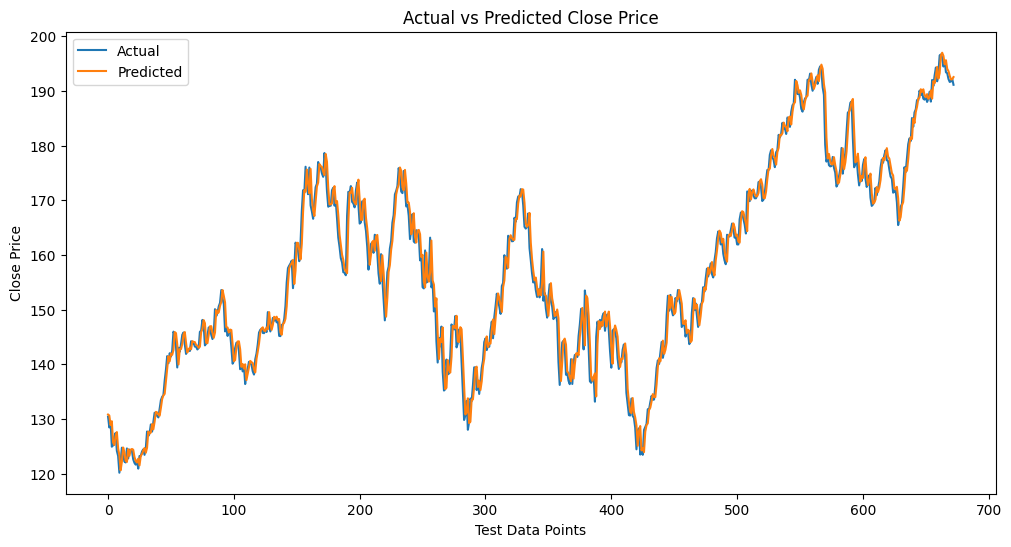

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(Y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Test Data Points')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Performing Multiple Models To see which ML algorithm is best


In [91]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(Y_test, rf_pred)
print("MSE-RandomForest : ", np.round(rf_mse, 2))
rf_mae = mean_absolute_error(Y_test, rf_pred)
print("MAE-RandomForest : ", np.round(rf_mae, 2))
rf_r2 = r2_score(Y_test, rf_pred)
print("R2-RandomForest : ", np.round(rf_r2, 2))

MSE-RandomForest :  780.53
MAE-RandomForest :  22.2
R2-RandomForest :  -1.25


In [92]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, Y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(Y_test, xgb_pred)
print("MSE-XGBoost : ", np.round(xgb_mse, 2))
xgb_mae = mean_absolute_error(Y_test, xgb_pred)
print("MSE-XGBoostt : ", np.round(xgb_mae, 2))
xgb_r2 = r2_score(Y_test, xgb_pred)
print("MSE-XGBoostt : ", np.round(xgb_r2, 2))

MSE-XGBoost :  951.37
MSE-XGBoostt :  25.34
MSE-XGBoostt :  -1.74


In [93]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE':   [mae, rf_mae, xgb_mae],
    'MSE':   [mse, rf_mse, xgb_mse],
    'R2':    [r2score, rf_r2, xgb_r2]
})

print(results)

               Model        MAE         MSE        R2
0  Linear Regression   2.007929    7.144470  0.979426
1      Random Forest  22.204369  780.525751 -1.247714
2            XGBoost  25.344387  951.370823 -1.739704


So by performing the Linear Regression is Giving Best results compared to RandomForest, XGBoost

In [96]:
import joblib
joblib.dump(model, 'stock_price_model.pkl')

['stock_price_model.pkl']

In [97]:
joblib.dump(feature_cols, 'feature_cols.pkl')

['feature_cols.pkl']